# Image Data Augmentation Using Deep Convolutional Generative Adversarial Network (DCGAN)
# Model - Enhanced Generated Images

## Load Libraries

In [20]:
import os
import numpy as np
from skimage.morphology import opening
from skimage import io
from skimage.util import img_as_ubyte
from skimage.morphology import disk
from skimage.morphology import ball
from skimage.exposure import adjust_gamma
from skimage.exposure import equalize_adapthist
from skimage.exposure import rescale_intensity
from skimage.exposure import equalize_hist

import matplotlib.pyplot as plt

## Load Mask Data

In [21]:
mask_list = []
# Loop through all the directories
for root, dirs, files in os.walk('data/gan_generated_images_4500_200/mask'):
    for afile in files:
        file_name = afile.split('.')
        if file_name[len(file_name)-1] == 'png':
            a_mask = img_as_ubyte(io.imread(os.path.join(root, afile), as_gray=True))
            mask_list.append([afile, a_mask])

num_files = len(mask_list)
num_files

100

In [22]:
mask_list[0][1].shape

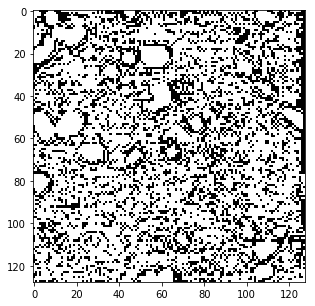

In [23]:
plt.figure(figsize=(5, 5))
plt.imshow(mask_list[0][1], cmap='gray')
plt.show()

## Enhanced the Mask Using Opening Morphological Operation

In [24]:
processed_mask_list = []
# Disk radius
radius = 3.5
selem = disk(radius)
for i in mask_list:
    processed_mask_list.append([i[0], opening(i[1], selem)])

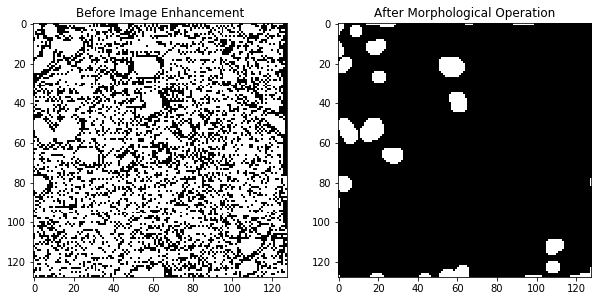

In [25]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(mask_list[0][1], cmap='gray')
plt.title('Before Image Enhancement')
plt.subplot(122)
plt.imshow(processed_mask_list[0][1], cmap='gray')
plt.title('After Morphological Operation')
plt.show()

In [26]:
# Save to file.
for i in processed_mask_list:
    io.imsave('data/gan_generated_images_4500_200/processed_mask/' + i[0], i[1])

## Load Image Data

In [27]:
image_list = []
# Loop through all the directories
for root, dirs, files in os.walk('data/gan_generated_images_4500_200/image'):
    for afile in files:
        file_name = afile.split('.')
        if file_name[len(file_name)-1] == 'png':
            a_image = io.imread(os.path.join(root, afile))
            image_list.append([afile, a_image])

num_files = len(image_list)
num_files

100

In [28]:
image_list[0][1].shape

(128, 128, 4)

In [29]:
type(image_list[0][1])

In [30]:
image_list[0][1].dtype

dtype('uint8')

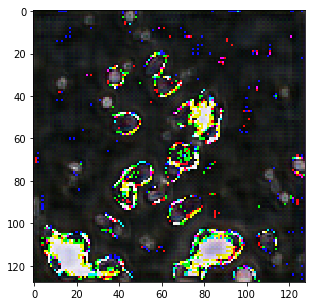

In [31]:
plt.figure(figsize=(5, 5))
plt.imshow(image_list[0][1])
plt.show()

## Enhance the Images Using Opening Morphological Operation and Adaptive Equalisation for contrast stretching.

In [32]:
processed_image_list = []
# Disk radius
radius = 3.5
selem = ball(radius)

for i in image_list:
    # Opening morphological operation
    opened = opening(i[1], selem)
    # Adaptive equalization
    equalized = (equalize_adapthist(opened, clip_limit=0.015) * 255.).astype(np.uint)
    # Add back alpha channel to image removed during image enhancement.
    alpha = np.expand_dims(i[1][:, :, 3], axis=2)
    equalized = np.concatenate((equalized, alpha), axis=2)
    processed_image_list.append([i[0], equalized])

/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


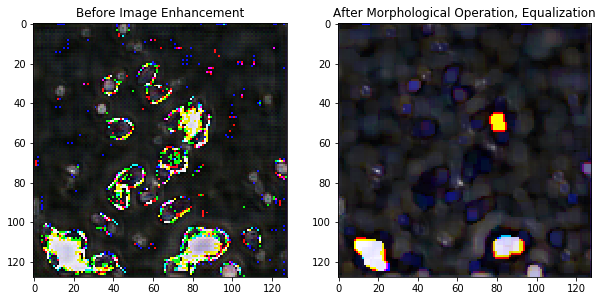

In [33]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image_list[0][1], cmap='viridis')
plt.title('Before Image Enhancement')
plt.subplot(122)
plt.imshow(processed_image_list[0][1], cmap='viridis')
plt.title('After Morphological Operation, Equalization')
plt.show()

# plt.figure(figsize=(5, 5))
# plt.imshow(processed_image_list[0][1])
# plt.title(processed_image_list[0][0])
# plt.show()

In [34]:
processed_image_list[0][1].shape

(128, 128, 4)

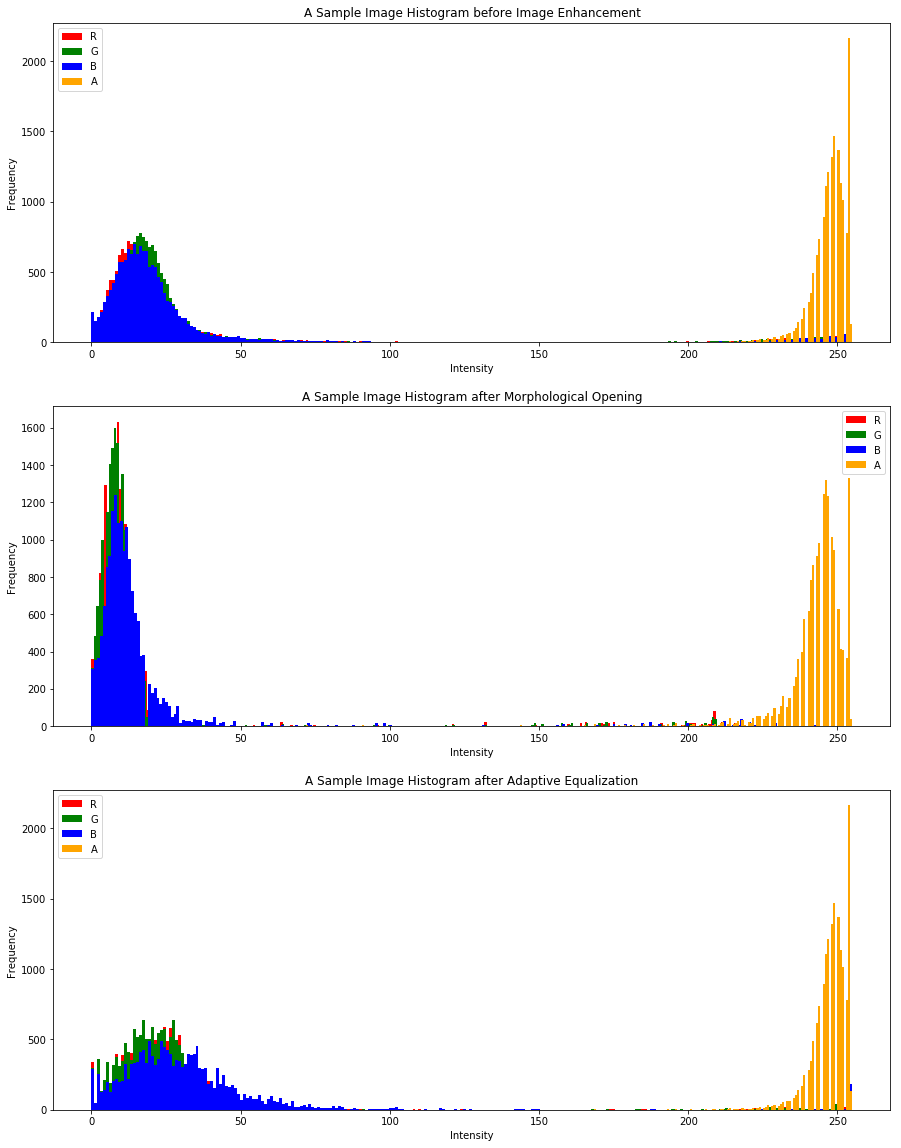

In [35]:
opened = opening(image_list[0][1], selem)

plt.figure(figsize=(15, 20), facecolor='white')

plt.subplot(311)
plt.hist(image_list[0][1][:, :, 0].flatten(), 256, label='R', color='red')
plt.hist(image_list[0][1][:, :, 1].flatten(), 256, label='G', color='green')
plt.hist(image_list[0][1][:, :, 2].flatten(), 256, label='B', color='blue')
plt.hist(image_list[0][1][:, :, 3].flatten(), 256, label='A', color='orange')
plt.legend()
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('A Sample Image Histogram before Image Enhancement')

plt.subplot(312)
plt.hist(opened[:, :, 0].flatten(), 256, label='R', color='red')
plt.hist(opened[:, :, 1].flatten(), 256, label='G', color='green')
plt.hist(opened[:, :, 2].flatten(), 256, label='B', color='blue')
plt.hist(opened[:, :, 3].flatten(), 256, label='A', color='orange')
plt.legend()
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('A Sample Image Histogram after Morphological Opening')

plt.subplot(313)
plt.hist(processed_image_list[0][1][:, :, 0].flatten(), 256, label='R', color='red')
plt.hist(processed_image_list[0][1][:, :, 1].flatten(), 256, label='G', color='green')
plt.hist(processed_image_list[0][1][:, :, 2].flatten(), 256, label='B', color='blue')
plt.hist(processed_image_list[0][1][:, :, 3].flatten(), 256, label='A', color='orange')
plt.legend()
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('A Sample Image Histogram after Adaptive Equalization')
plt.show()

The histogram is stretched for the darker parts of the image.

## Comparison of Different Image Enhancement Techniques

In [36]:
ag = (adjust_gamma(opened, gamma=0.5)).astype(np.uint)
ri = (rescale_intensity(opened)).astype(np.uint)
eh = (equalize_hist(opened) * 255.).astype(np.uint)

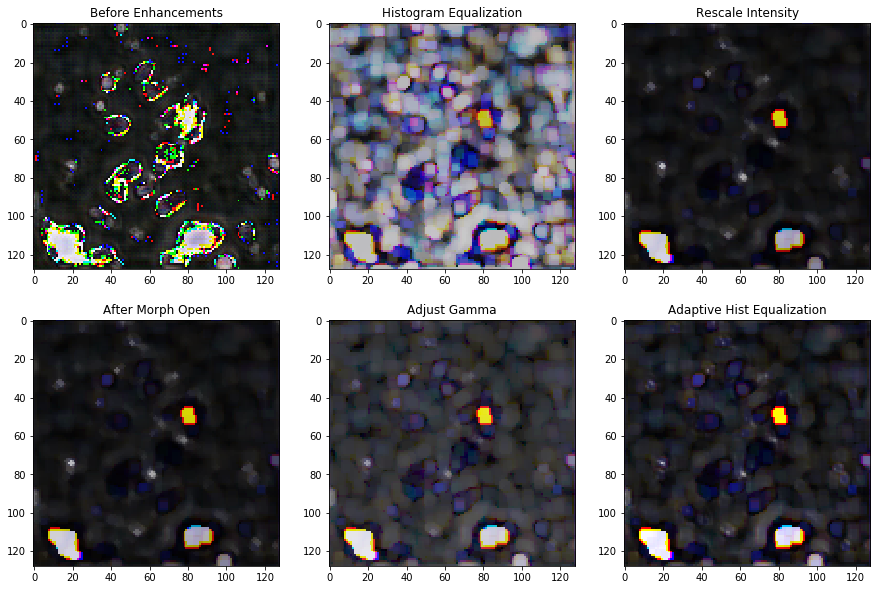

In [37]:
plt.figure(figsize=(15, 10))

plt.subplot(231)
plt.imshow(image_list[0][1], cmap='viridis')
plt.title('Before Enhancements')

plt.subplot(232)
plt.imshow(eh, cmap='viridis')
plt.title('Histogram Equalization')

plt.subplot(233)
plt.imshow(ri, cmap='viridis')
plt.title('Rescale Intensity')

plt.subplot(234)
plt.imshow(opened, cmap='viridis')
plt.title('After Morph Open')

plt.subplot(235)
plt.imshow(ag, cmap='viridis')
plt.title('Adjust Gamma')

plt.subplot(236)
plt.imshow(processed_image_list[0][1], cmap='viridis')
plt.title('Adaptive Hist Equalization')

plt.show()

In [38]:
for i in processed_image_list:
    io.imsave('data/gan_generated_images_4500_200/processed_image/' + i[0], i[1])

/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from uint64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/vXGeFhFmsdnl_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/util/dtype.py:179: UserWarning: Downcasting uint64 to uint8 without scaling because max value 255 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))
/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/tIUkPM3jUIY5_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/tkokkeng/py

/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/9jLh6bxy3aDl_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/SpHQgw7dFQFY_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/NPjbKWsSwaDL_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/WmVKemwSZmRb_image.png is a low contrast image
  warn('%s is a low contrast 

/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/wySR28xo5PI4_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/witrSz49ijee_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/QRh2zLzBdhFU_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/e4g83zow7dKT_image.png is a low contrast image
  warn('%s is a low contrast 

/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/dXRfUNOEeT5a_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/duibXHO08wHw_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/myCqGbPbdCcO_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/IIeVFusWD6Cs_image.png is a low contrast image
  warn('%s is a low contrast 

/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/CXZ83pUncuCw_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/nA9X2czkvPwO_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/18eS7w6fvoj6_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/2unRXb9z1tYO_image.png is a low contrast image
  warn('%s is a low contrast 

/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/Iv6aXRz6cA5o_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/aK57cFgGpciH_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/C72X5zdUidfj_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/RBLyWdsaVjoj_image.png is a low contrast image
  warn('%s is a low contrast 

/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/av4bBWgsoc44_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/yhbCopaCw2WC_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/9pWR0R3wgSZt_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data/gan_generated_images_4500_200/processed_image/I3vC5l0vwOMS_image.png is a low contrast image
  warn('%s is a low contrast 